# <center> Ayudantía Data Science - Fundamentos de Data Science
-----------

### Wilson Mejías Caballero

In [1]:
#Importación de librerias 

import pandas as pd
import numpy as np
import scipy as scy
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')

### Accidentes de Transito y clima

Para esta actividad deberá utilizar la base de datos “BD_Actividad2.txt” la cual contiene datos ficticios de variables registradas para días de tormenta. El objetivo de esta actividad es poder trabajar con distintos tipos de variables y determinar el nivel de asociación que existe entre estas, mediante índices de correlación. Una vez definidas las variables con mayor parentesco, se realizará un modelo lineal con estas.

Listado de Variables:

* temperatura: Temperatura media (°C) registrada durante día controlado
* precipitación: Precipitación total (mm) registrada durante día controlado
* velocidad_viento: Velocidad media (km/hra) registrada durante día controlado
* Caudal: Caudadl medio (m3/seg) del curso de agua de la avinda principal durante día controlado
* N_accidentes: Número de aacidentes registrados durante día controlado

In [2]:
#Importación de base de datos

df1=pd.read_table("BD_Actividad2.txt", decimal=",", encoding="latin-1")

In [3]:
df1.head()

,temperatura,precipitación,velocidad_viento,Caudal,N_de_accidentes
0,11,17,28,21.33,1
1,7,6,8,14.00,1
2,16,33,30,32.00,8
3,28,0,9,10.00,2
4,11,21,9,24.00,8


In [4]:
df1.shape

(29, 5)

In [5]:
#Analisis preliminar de las variabless

df1.describe()

,temperatura,precipitación,velocidad_viento,Caudal,N_de_accidentes
count,29.000000,29.000000,29.000000,29.000000,29.000000
mean,17.689655,12.034483,16.551724,16.916207,4.931034
std,7.649012,18.605842,7.716338,9.124622,3.069796
min,3.000000,0.000000,8.000000,10.000000,1.000000
25%,11.000000,2.000000,10.000000,12.000000,2.000000
50%,20.000000,4.000000,15.000000,12.670000,5.000000
75%,23.000000,13.000000,22.000000,19.330000,8.000000
max,28.000000,69.000000,30.000000,51.330000,10.000000


In [6]:
#Función para graficar variables en un Data Frame

def explor (df):
    for n, i in enumerate(df):
        plt.subplot((len(list(df.columns))/3)+1,3,n+1)
        if df[i].dtypes ==float:
            sns.distplot(df[i])
            plt.title(i)
            plt.xlabel("")
        elif df[i].dtypes =="object":
            sns.countplot(df[i])
            plt.title(i)
            plt.xlabel("")
        else:
            sns.distplot(df[i],kde=False)
            plt.title(i)
            plt.xlabel("")
    plt.tight_layout()

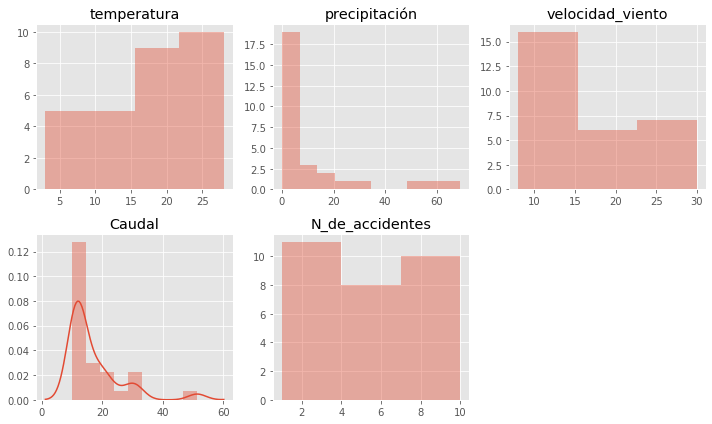

In [7]:
#Graficar Variables

plt.rcParams['figure.figsize'] = (10, 6)
explor(df1)

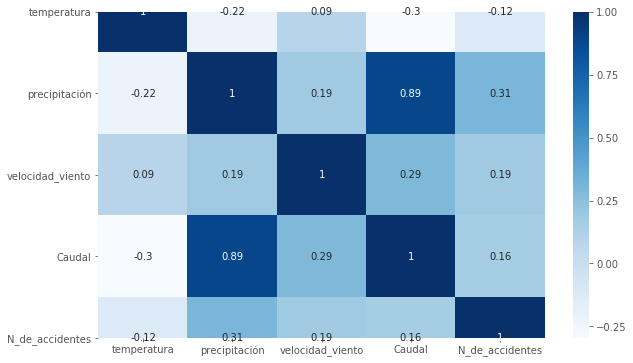

In [8]:
#Nivel de Asoción entre variables

sns.heatmap(df1.corr( method='pearson'), annot=True, cmap="Blues")

Al parecer la relación más importante para el número de accidentes, sería la cantidad de precipitación que cae durante el día. 

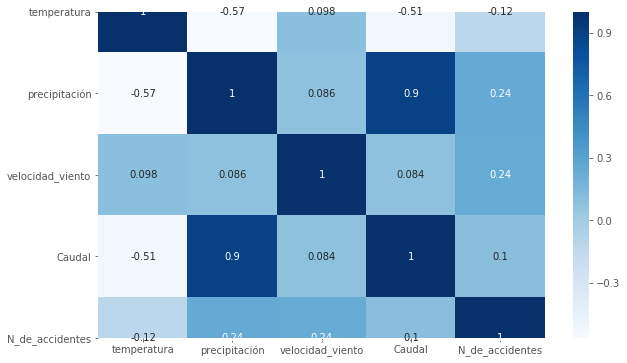

In [9]:
sns.heatmap(df1.corr( method='spearman'), annot=True, cmap="Blues")

Al parecer la relación entre el número de accidentes y la precipitación sería del tipo lineal, ya que el valor de la correlación de pearson de ajusta de mejor manera que el de spearman

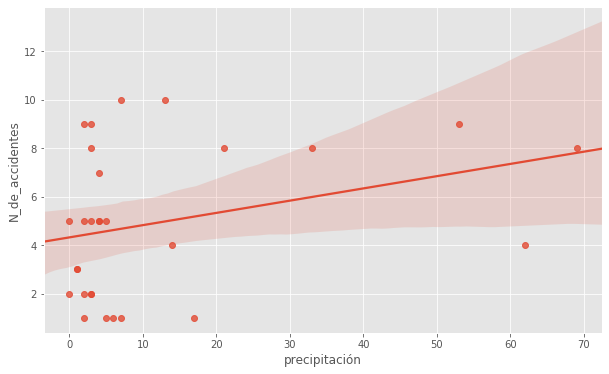

In [10]:
#Grafico de Dispersión entre variables

sns.regplot(y="N_de_accidentes",x= "precipitación", data=df1)

Se aprecia una cierta relación lineal, pero los puntos aún tienen mucha dispersión.

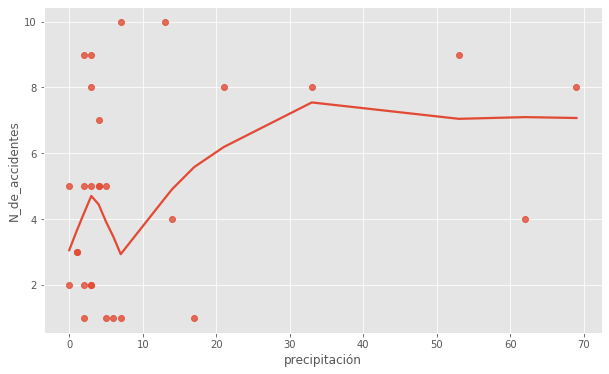

In [11]:
sns.regplot(y="N_de_accidentes",x= "precipitación", data=df1,lowess=True)

Tampoco se aprecia una relación que sea no lineal enre las variables

In [12]:
#Significacia de la correlación

from scipy.stats.stats import pearsonr
pearsonr(df1["precipitación"], df1["N_de_accidentes"])


(0.3064364237751781, 0.10592334304578208)

# Crecimiento de plantas 

Para esta actividad deberá utilizar la base de datos “BD_Actividad3.csv” la cual contiene datos ficticios de crecimiento de plantas. El Objetivo de esta actividad es verificar las diferencias exixtentes entre los sitios y ttratamientos. variables:

* Crecimiento_altura: Crecimiento en altura (cm) de plantas al momento de ser evaluadas 
* Crecimiento_diametro: Crecimiento en diametro (mm) de plantas al momento de ser evaluadas
* Tratamiento: Tipo de Fertilizante aplicado a la planta
* Zona: Sitio en donde esta creciendo la plata



In [13]:
df2=pd.read_csv("BD _Actividad3.csv")

In [14]:
df2.head()

,Crecimiento_altura;Crecimiento_diametro;Tratamiento;Zona
0,34;39;Tr1;Z1
1,29;50;Tr1;Z1
2,33;56;Tr1;Z1
3,28;48;Tr1;Z1
4,39;34;Tr1;Z1


In [15]:
#Corregir problema del separador

df2=pd.read_csv("BD _Actividad3.csv", sep=";")

In [16]:
df2.head()

,Crecimiento_altura,Crecimiento_diametro,Tratamiento,Zona
0,34,39,Tr1,Z1
1,29,50,Tr1,Z1
2,33,56,Tr1,Z1
3,28,48,Tr1,Z1
4,39,34,Tr1,Z1


In [17]:
df2.shape

(45, 4)

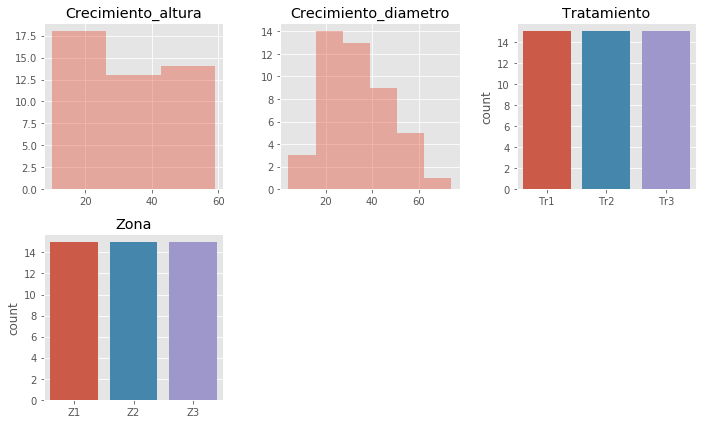

In [18]:
explor(df2)

In [19]:
#Realizamos graficos pla ver diferencias entre valores

def df_boxplot (df):
    
    categorica=[]
    numerica=[]
    
    for n, i in enumerate(df):
        if (df[i].dtypes =="object"):
            categorica.append(i)
        else:
            numerica.append(i)
    print("Las variables numericas son {}".format(numerica))
    print("Las variables cateroricas son {}".format(categorica))    
    
    n=1
    for i in categorica:
        for j in numerica:
            plt.subplot((len(list(df.columns))/3)+1,3,n)
            ax=sns.boxplot(x=i, y=j ,data=df)
            n+=1
    plt.tight_layout()

Las variables numericas son ['Crecimiento_altura', 'Crecimiento_diametro']
Las variables cateroricas son ['Tratamiento', 'Zona']


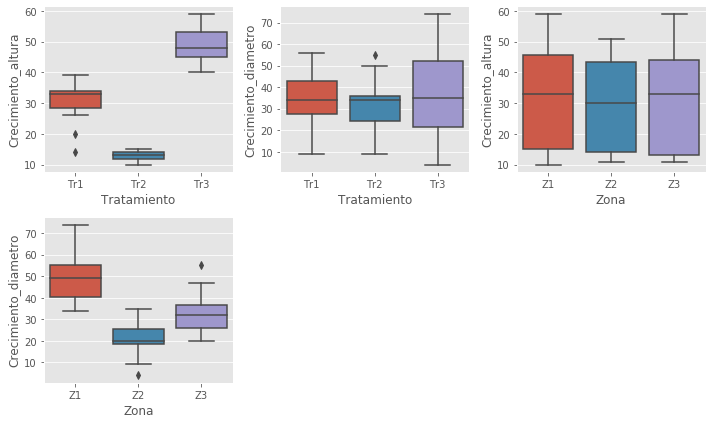

In [20]:
df_boxplot(df2)

Se pueden apreciar diferencias entre el crecimiento en altura de los diferentes tratamiento y el crecimiento en diametro de las distintas zonas.

In [21]:
#Realizar ANOVA

import statsmodels.api as sm
from statsmodels.formula.api import ols

#### En ANOVA se plantean las siguientes hipotesis


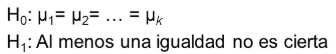



In [22]:
model = ols('Crecimiento_altura ~ Tratamiento', data=df2).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Crecimiento_altura   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     188.2
Date:                Tue, 13 Aug 2019   Prob (F-statistic):           1.08e-21
Time:                        20:55:45   Log-Likelihood:                -135.97
No. Observations:                  45   AIC:                             277.9
Df Residuals:                      42   BIC:                             283.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             30.3333      1.327     22.856      0.000      27.655      33.012
Tratamiento[T.Tr2]   -17.4000      1.877     -9.271      0.000     -21.188     -13.612
Tratamiento[T.Tr3]    19.0000      1.877     10.123      0.000      15.212      22.788
==============================================================================
Omnibus:                        7.451   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.024   Jarque-Bera (JB):                7.406
Skew:                          -0.605   Prob(JB):                       0.0246
Kurtosis:                       4.577   Cond. No.                         3.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Los coeficientes de de los tratamiento 2 y  tratamiento3 son menores que 0.05, por lo que se asume que existe un efecto significativo sobre el crecimiento en altura

In [23]:
model = ols('Crecimiento_diametro ~ Zona', data=df2).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Crecimiento_diametro   R-squared:                       0.578
Model:                              OLS   Adj. R-squared:                  0.558
Method:                   Least Squares   F-statistic:                     28.74
Date:                  Tue, 13 Aug 2019   Prob (F-statistic):           1.37e-08
Time:                          20:55:45   Log-Likelihood:                -165.31
No. Observations:                    45   AIC:                             336.6
Df Residuals:                        42   BIC:                             342.0
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     48.3333      2.547     18.975      0.000      43.193      53.474
Zona[T.Z2]   -27.2667      3.602     -7.569      0.000     -34.536     -19.997
Zona[T.Z3]   -15.0000      3.602     -4.164      0.000     -22.270      -7.730
==============================================================================
Omnibus:                        1.953   Durbin-Watson:                   1.663
Prob(Omnibus):                  0.377   Jarque-Bera (JB):                1.430
Skew:                           0.436   Prob(JB):                        0.489
Kurtosis:                       3.038   Cond. No.                         3.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Los coeficientes de de las Zona 2 y Zona 3 son menores que 0.05, por lo que se asume que existe un efecto significativo sobre el crecimiento en diametro

In [24]:
model = ols('Crecimiento_diametro ~ Tratamiento', data=df2).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Crecimiento_diametro   R-squared:                       0.022
Model:                              OLS   Adj. R-squared:                 -0.025
Method:                   Least Squares   F-statistic:                    0.4642
Date:                  Tue, 13 Aug 2019   Prob (F-statistic):              0.632
Time:                          20:55:45   Log-Likelihood:                -184.22
No. Observations:                    45   AIC:                             374.4
Df Residuals:                        42   BIC:                             379.9
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             34.0000      3.878      8.768      0.000      26.175      41.825
Tratamiento[T.Tr2]    -2.2667      5.484     -0.413      0.681     -13.334       8.800
Tratamiento[T.Tr3]     3.0000      5.484      0.547      0.587      -8.067      14.067
==============================================================================
Omnibus:                        0.209   Durbin-Watson:                   1.026
Prob(Omnibus):                  0.901   Jarque-Bera (JB):                0.319
Skew:                           0.147   Prob(JB):                        0.853
Kurtosis:                       2.711   Cond. No.                         3.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Los coeficientes son mayores a 0.05, no existiría efecto